In [56]:
def filter_short_ground_truths(df):
    """篩選 ground_truths_ans 長度小於2的資料列"""
    mask = df['ground_truths_ans'].apply(
        lambda x: len(x.split()) if isinstance(x, str) else (len(x) if isinstance(x, list) else 0)
    ) > 2
    return df[mask]


F1 Score - 平均: 0.1069, 最大: 1.0000, 最小: 0.0000


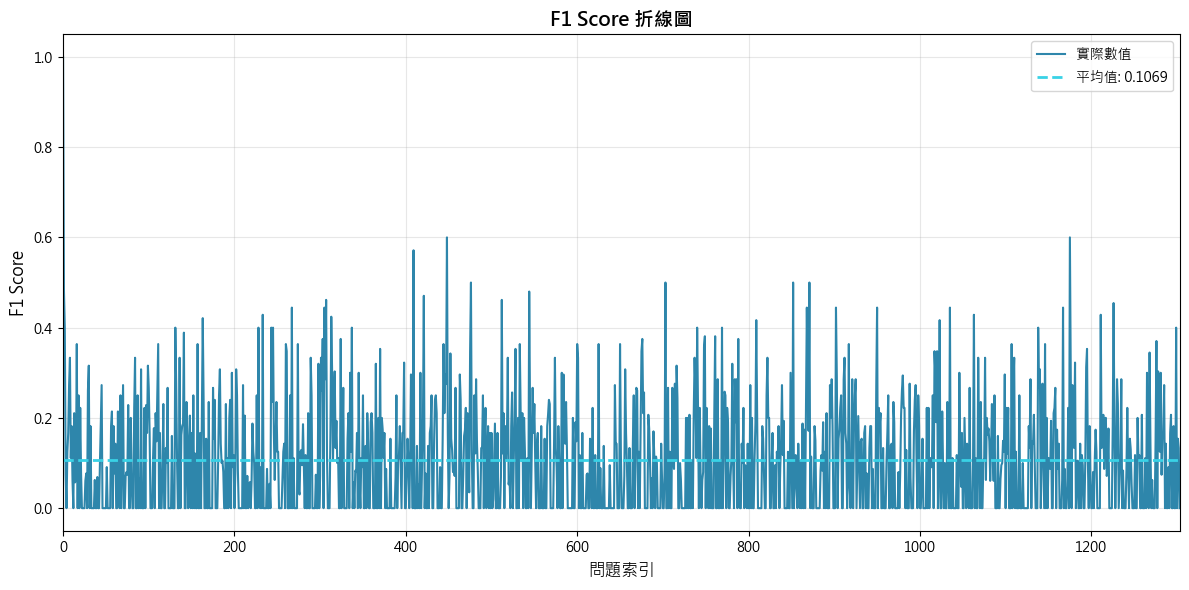

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'Arial Unicode MS']
matplotlib.rcParams['axes.unicode_minus'] = False

def plot_line_from_csv(csv_file, col_index=0, xlabel='索引', ylabel='數值', title='折線圖', header=None, adjustment=1, filter = True):
    """
    從 CSV 檔案讀取指定列並繪製折線圖
    
    參數:
        csv_file: CSV 檔案路徑
        col_index: 要繪製的列索引，預設為 0（第一列）
        xlabel: X 軸標籤，預設為 '索引'
        ylabel: Y 軸標籤，預設為 '數值'
        title: 圖表標題，預設為 '折線圖'
        header: CSV 檔案的標頭列索引，None 表示無標頭，0 表示第一列是標頭
        adjustment: 數據調整係數，預設為 1
    
    回傳:
        fig: matplotlib 圖表物件
    """
    # 讀取 CSV 檔案
    df = pd.read_csv(csv_file, header=header)
    if filter:
        df = filter_short_ground_truths(df)
    # 取得指定列的數據並轉換為數值類型
    data = pd.to_numeric(df.iloc[:, col_index], errors='coerce').values * adjustment
    
    # 建立 x 軸索引
    x = range(len(data))
    
    # 建立圖表
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # 繪製折線圖（不使用 marker，只有線）
    ax.plot(x, data, linewidth=1.5, color='#2E86AB', label='實際數值')
    
    # 過濾掉 NaN 值後計算平均值
    data_clean = data[~np.isnan(data)]
    
    if len(data_clean) > 0:
        mean_value = data_clean.mean()
        # 繪製平均值水平線
        ax.axhline(y=mean_value, color="#39D2E6", linestyle='--', linewidth=2, 
                   label=f'平均值: {mean_value:.4f}')
        print(f"{ylabel} - 平均: {mean_value:.4f}, 最大: {data_clean.max():.4f}, 最小: {data_clean.min():.4f}")
    else:
        print(f"警告: 沒有有效的數值數據")
    
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-0.5, len(data)-0.5)
    ax.legend(loc='best', fontsize=10)
    
    # 調整布局
    plt.tight_layout()
    
    # 顯示圖表
    plt.show()
    
    return fig

# 使用範例
if __name__ == "__main__":
    # 繪製 F1 Score 折線圖（第一列，無標頭）
    plot_line_from_csv(
        csv_file='med_baseline.csv',
        col_index=0,
        xlabel='問題索引',
        ylabel='F1 Score',
        title='F1 Score 折線圖',
        header=0,
        filter=True
    )

F1 Score - 平均: 0.0356, 最大: 1.0000, 最小: 0.0000


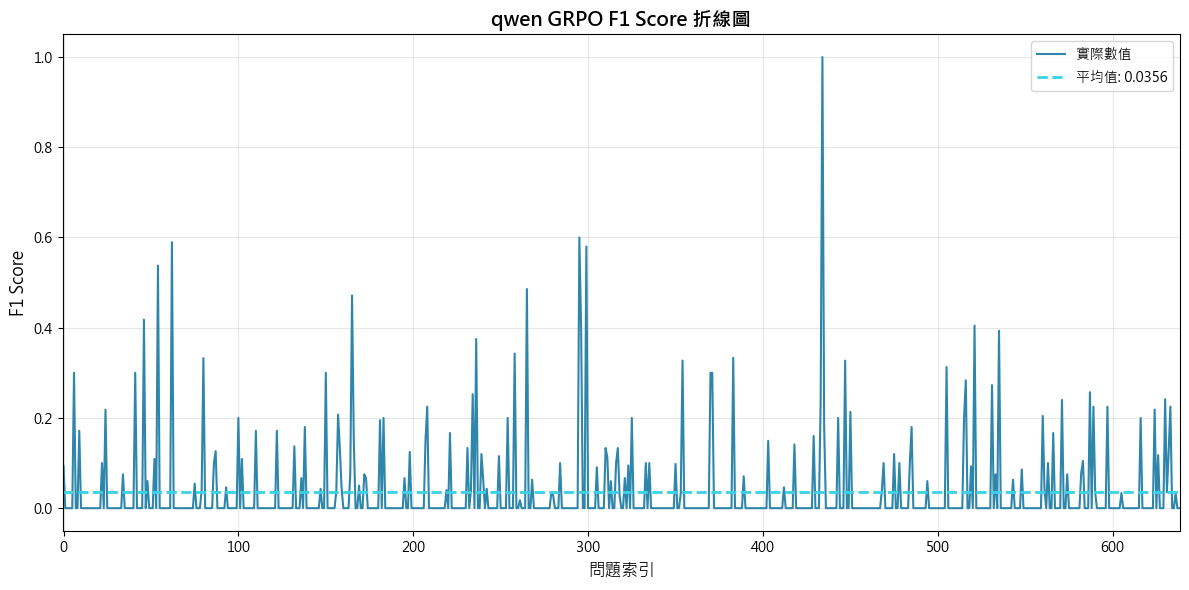

In [58]:

# 使用範例
if __name__ == "__main__":
    # 繪製 F1 Score 折線圖（第一列，無標頭）
    plot_line_from_csv(
        csv_file='qwen3_GRPO_F1.csv',
        col_index=2,
        xlabel='問題索引',
        ylabel='F1 Score',
        title='qwen GRPO F1 Score 折線圖',
        header=0,
        adjustment=0.2,
        filter=False
    )

F1 Score - 平均: 0.2393, 最大: 0.8889, 最小: 0.0000


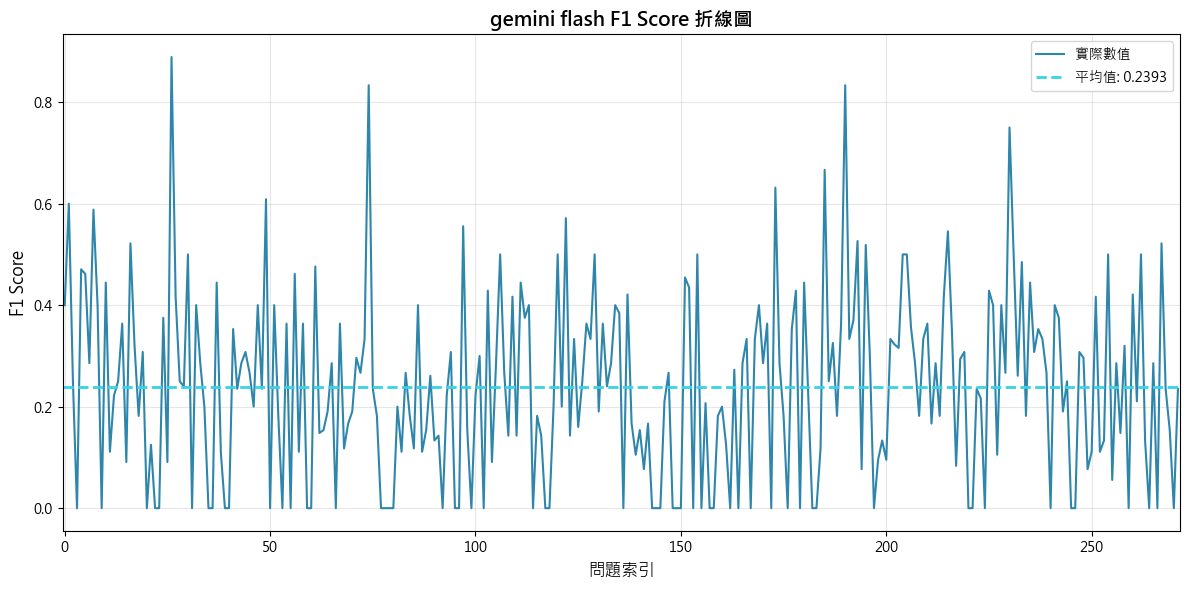

In [59]:
# 使用範例
if __name__ == "__main__":
    # 繪製 F1 Score 折線圖（第一列，無標頭）
    plot_line_from_csv(
        csv_file='gemini_flash_results.csv',
        col_index=0,
        xlabel='問題索引',
        ylabel='F1 Score',
        title='gemini flash F1 Score 折線圖',
        header=0,
        adjustment=1
    )

F1 Score - 平均: 0.2618, 最大: 0.8000, 最小: 0.0000


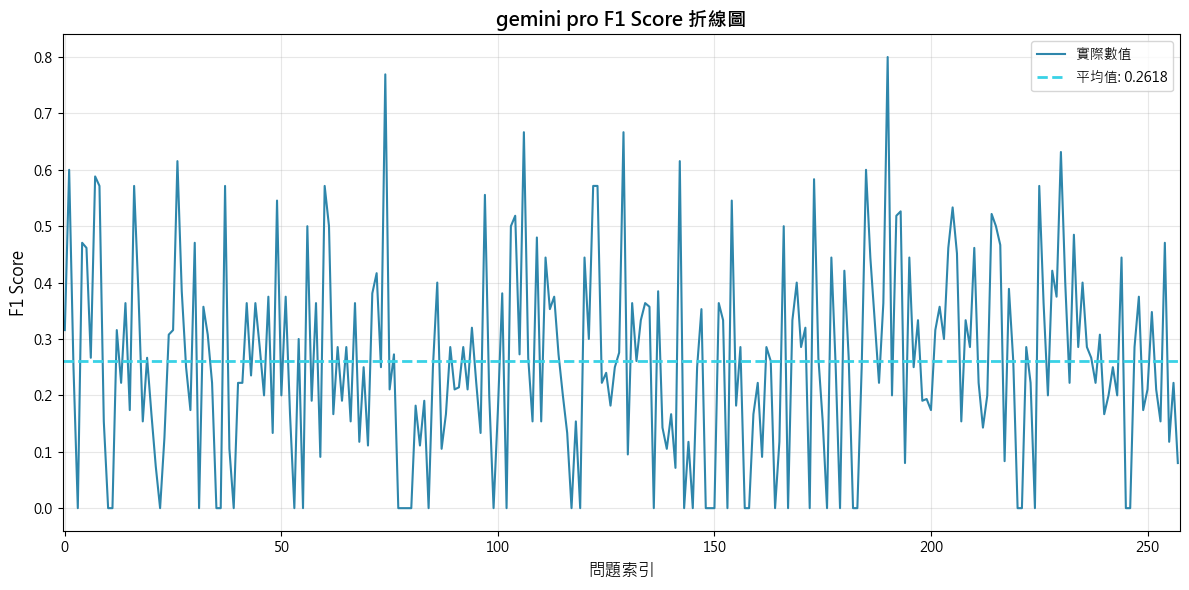

In [60]:
# 使用範例
if __name__ == "__main__":
    # 繪製 F1 Score 折線圖（第一列，無標頭）
    plot_line_from_csv(
        csv_file='gemini_pro_results.csv',
        col_index=0,
        xlabel='問題索引',
        ylabel='F1 Score',
        title='gemini pro F1 Score 折線圖',
        header=0,
        adjustment=1
    )

medgemma 4B - 平均: 0.1064, 最大: 1.0000, 最小: 0.0000
  有效數據點: 1328/1329
Qwen3 4B GRPO  - 平均: 0.0356, 最大: 1.0000, 最小: 0.0000
  有效數據點: 639/640


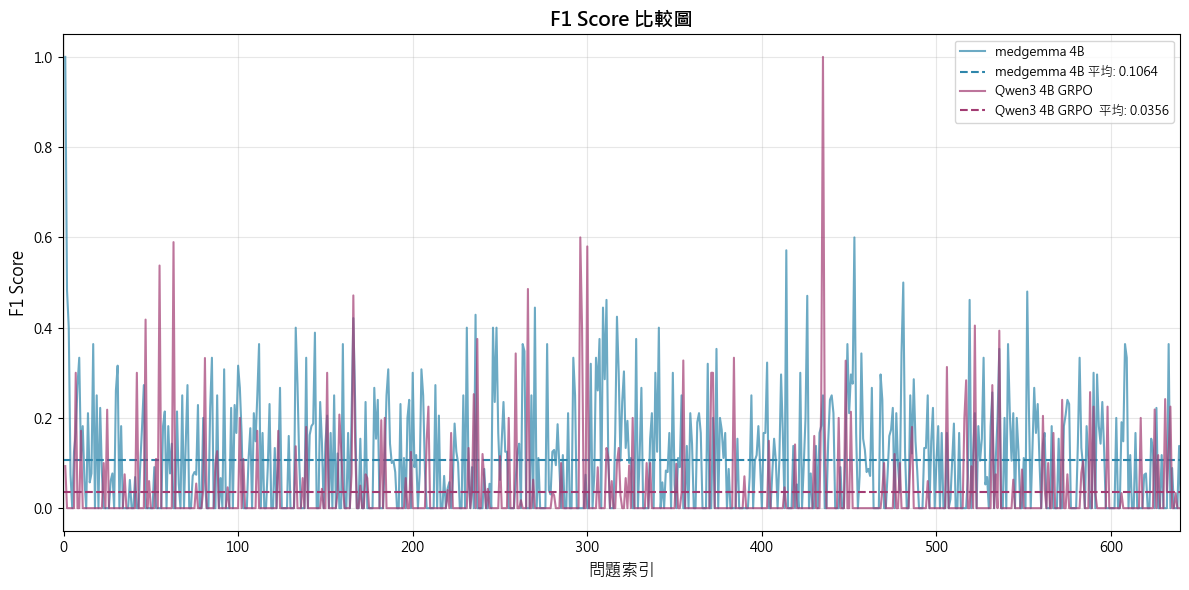

In [61]:
def plot_multiple_lines_from_csv(csv_configs, xlabel='索引', ylabel='數值', title='折線圖比較', filter = True):
    """
    從多個 CSV 檔案讀取指定列並繪製在同一張折線圖上
    
    參數:
        csv_configs: list of dict，每個 dict 包含:
            - csv_file: CSV 檔案路徑
            - col_index: 要繪製的列索引
            - label: 圖例標籤
            - header: CSV 檔案的標頭列索引
            - adjustment: 數據調整係數（可選，預設為 1）
            - color: 線條顏色（可選）
        xlabel: X 軸標籤
        ylabel: Y 軸標籤
        title: 圖表標題
    
    回傳:
        fig: matplotlib 圖表物件
    """
    # 建立圖表
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # 記錄最短的數據長度
    min_length = float('inf')
    
    # 繪製每個 CSV 的數據
    for config in csv_configs:
        csv_file = config['csv_file']
        col_index = config['col_index']
        label = config['label']
        header = config.get('header', None)
        adjustment = config.get('adjustment', 1)
        color = config.get('color', None)
        
        # 讀取 CSV 檔案
        df = pd.read_csv(csv_file, header=header)
        if filter:
            df = filter_short_ground_truths(df)
        
        # 取得指定列的數據並轉換為數值類型
        data = pd.to_numeric(df.iloc[:, col_index], errors='coerce').values * adjustment
        
        # 更新最短長度
        min_length = min(min_length, len(data))
        
        # 建立 x 軸索引
        x = range(len(data))
        
        # 繪製折線圖
        if color:
            ax.plot(x, data, linewidth=1.5, label=label, color=color, alpha=0.7)
        else:
            line = ax.plot(x, data, linewidth=1.5, label=label , alpha=0.7)
            color = line[0].get_color()  # 獲取自動分配的顏色
        
        # 計算並印出統計資訊，同時繪製平均線
        data_clean = data[~np.isnan(data)]
        if len(data_clean) > 0:
            mean_value = data_clean.mean()
            # 繪製平均值水平線（使用相同顏色但更淡，虛線樣式）
            ax.axhline(y=mean_value, color=color, linestyle='--', linewidth=1.5, 
                      alpha=1, label=f'{label} 平均: {mean_value:.4f}')
            
            print(f"{label} - 平均: {mean_value:.4f}, 最大: {data_clean.max():.4f}, 最小: {data_clean.min():.4f}")
            print(f"  有效數據點: {len(data_clean)}/{len(data)}")
    
    # 設定圖表屬性
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-0.5, min_length - 0.5)  # 使用最短的數據長度
    ax.legend(fontsize=9, loc='best')
    
    # 調整布局
    plt.tight_layout()
    
    # 顯示圖表
    plt.show()
    
    return fig

# 使用範例
if __name__ == "__main__":
    # 比較兩個模型的 F1 Score
    plot_multiple_lines_from_csv(
        csv_configs=[
            {
                'csv_file': 'med_baseline.csv',
                'col_index': 0,
                'label': 'medgemma 4B',
                'header': None,
                'color': '#2E86AB'
            },
            {
                'csv_file': 'qwen3_GRPO_F1.csv',
                'col_index': 2,
                'label': 'Qwen3 4B GRPO ',
                'header': None,
                'adjustment': 0.2,
                'color': '#A23B72'
            }
        ],
        xlabel='問題索引',
        ylabel='F1 Score',
        title='F1 Score 比較圖',
        filter=False
    )

medgemma 4B - 平均: 0.1069, 最大: 1.0000, 最小: 0.0000
  有效數據點: 1304/1304
Qwen3 4B - 平均: 0.1806, 最大: 1.0000, 最小: 0.0000
  有效數據點: 3782/3782


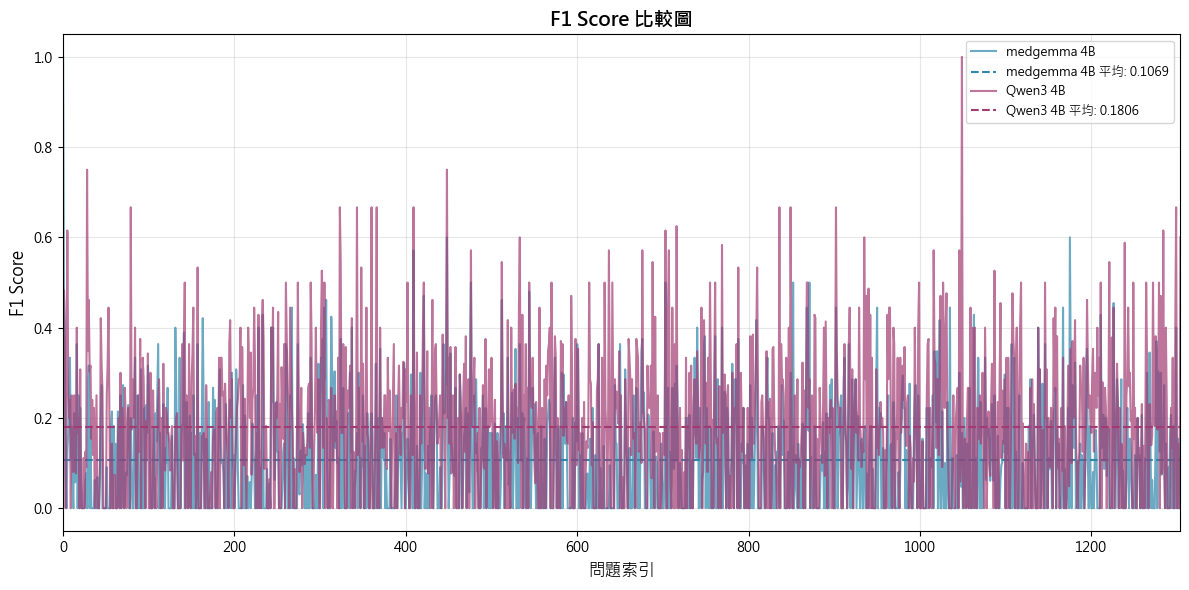

In [62]:
if __name__ == "__main__":
    # 比較兩個模型的 F1 Score
    plot_multiple_lines_from_csv(
        csv_configs=[
            {
                'csv_file': 'med_baseline.csv',
                'col_index': 0,
                'label': 'medgemma 4B',
                'header': 0,
                'color': '#2E86AB'
            },
            {
                'csv_file': 'qwen_baseline.csv',
                'col_index': 0,
                'label': 'Qwen3 4B',
                'header': 0,
                'color': '#A23B72'
            }
        ],
        xlabel='問題索引',
        ylabel='F1 Score',
        title='F1 Score 比較圖',
        filter=True
    )

medgemma 4B - 平均: 1449.5905, 最大: 2000.0000, 最小: 50.0000
  有效數據點: 1304/1304
Qwen3 4B - 平均: 480.8509, 最大: 2000.0000, 最小: 126.0000
  有效數據點: 3782/3782


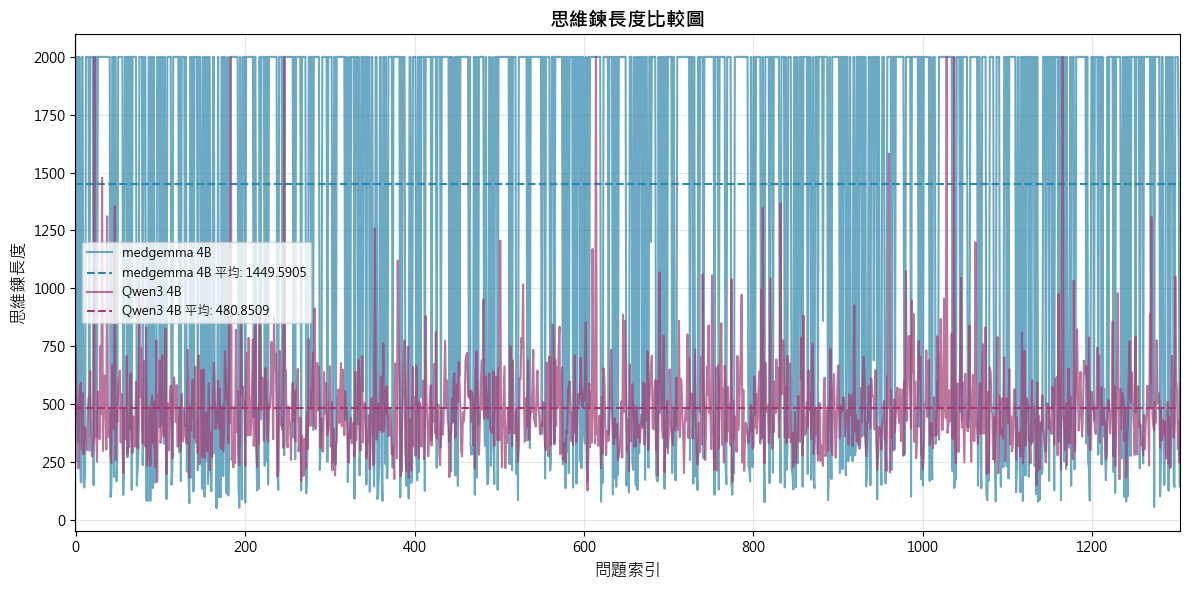

In [63]:
if __name__ == "__main__":
    # 比較兩個模型的 F1 Score
    plot_multiple_lines_from_csv(
        csv_configs=[
            {
                'csv_file': 'med_baseline.csv',
                'col_index': 1,
                'label': 'medgemma 4B',
                'header': 0,
                'color': '#2E86AB'
            },
            {
                'csv_file': 'qwen_baseline.csv',
                'col_index': 1,
                'label': 'Qwen3 4B',
                'header': 0,
                'color': '#A23B72'
            }
        ],
        xlabel='問題索引',
        ylabel='思維鍊長度',
        title='思維鍊長度比較圖',
        filter=True
    )

gemini_flash - 平均: 0.2393, 最大: 0.8889, 最小: 0.0000
  有效數據點: 272/272
Qwen3 14B - 平均: 0.2544, 最大: 0.9091, 最小: 0.0000
  有效數據點: 706/706


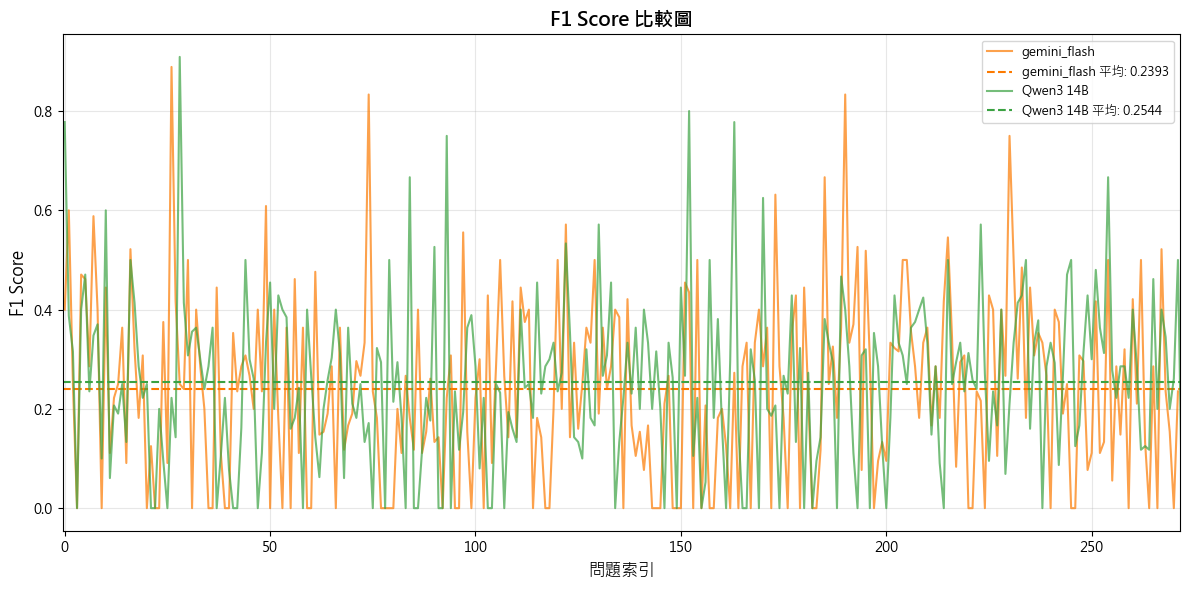

In [64]:
if __name__ == "__main__":
    # 比較兩個模型的 F1 Score
    plot_multiple_lines_from_csv(
        csv_configs=[
            {
                'csv_file': 'gemini_flash_results.csv',
                'col_index': 0,
                'label': 'gemini_flash',
                'header': 0,
                'color': "#FC7A00"
            },
            {
                'csv_file': 'qwen_baseline_14B.csv',
                'col_index': 0,
                'label': 'Qwen3 14B',
                'header': 0,
                'color': "#3BA242"
            }
        ],
        xlabel='問題索引',
        ylabel='F1 Score',
        title='F1 Score 比較圖',
        filter=True
    )

gemini_flash_v0 - 平均: 0.3255, 最大: 0.9091, 最小: 0.0000
  有效數據點: 366/366
gemini_pro_v0 - 平均: 0.3469, 最大: 0.9091, 最小: 0.0000
  有效數據點: 333/333


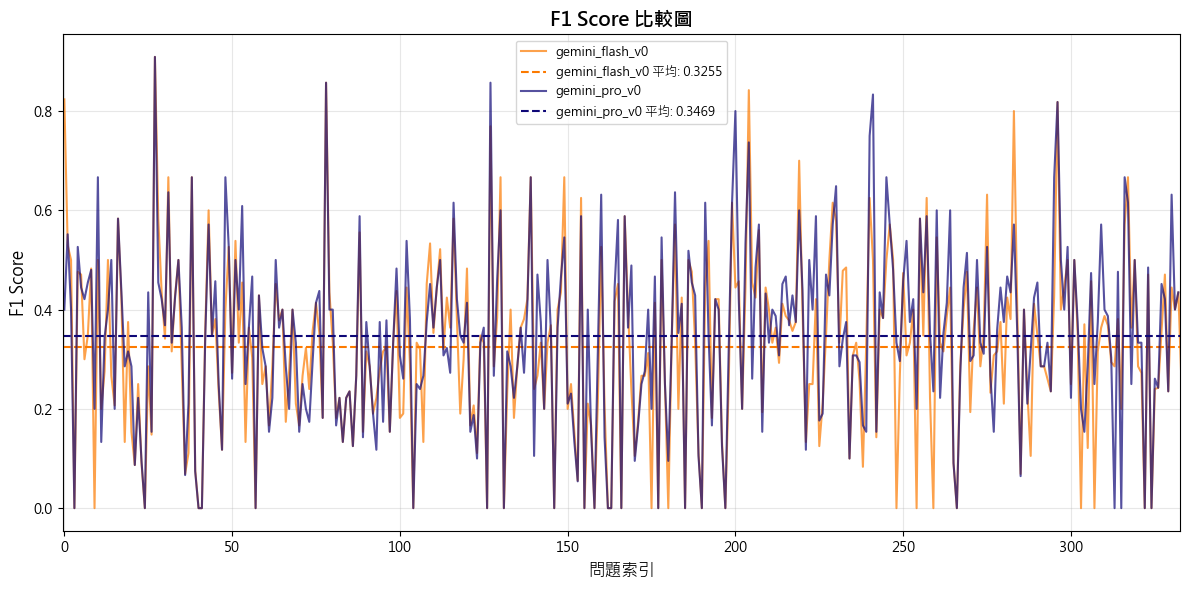

In [65]:
if __name__ == "__main__":
    # 比較兩個模型的 F1 Score
    plot_multiple_lines_from_csv(
        csv_configs=[
            {
                'csv_file': 'gemini_flash_results_v0.csv',
                'col_index': 0,
                'label': 'gemini_flash_v0',
                'header': 0,
                'color':  "#FC7A00"
            },
            {
                'csv_file': 'gemini_pro_results_v0.csv',
                'col_index': 0,
                'label': 'gemini_pro_v0',
                'header': 0,
                'color': "#0E0777"
            }
        ],
        xlabel='問題索引',
        ylabel='F1 Score',
        title='F1 Score 比較圖',
        filter=True
    )

Qwen3 14B_v2 - 平均: 0.2513, 最大: 0.9091, 最小: 0.0000
  有效數據點: 570/570
gemini_flash - 平均: 0.3255, 最大: 0.9091, 最小: 0.0000
  有效數據點: 366/366


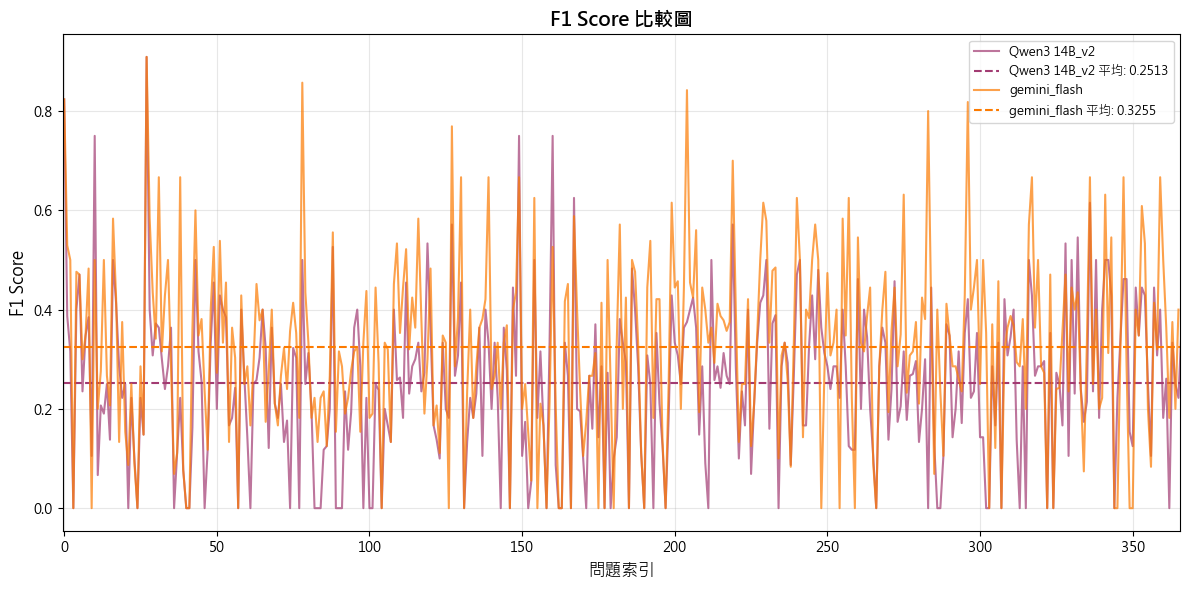

In [66]:
if __name__ == "__main__":
    # 比較兩個模型的 F1 Score
    plot_multiple_lines_from_csv(
        csv_configs=[
            {
                'csv_file': 'qwen_baseline_14B_v2.csv',
                'col_index': 0,
                'label': 'Qwen3 14B_v2',
                'header': 0,
                'color': '#A23B72'
            },
            {
                'csv_file': 'gemini_flash_results_v0.csv',
                'col_index': 0,
                'label': 'gemini_flash',
                'header': 0,
                'color':  "#FC7A00"
            }
        ],
        xlabel='問題索引',
        ylabel='F1 Score',
        title='F1 Score 比較圖',
        filter=True
    )

Qwen3 14B_v2 - 平均: 0.2513, 最大: 0.9091, 最小: 0.0000
  有效數據點: 570/570
gemini_pro - 平均: 0.3469, 最大: 0.9091, 最小: 0.0000
  有效數據點: 333/333


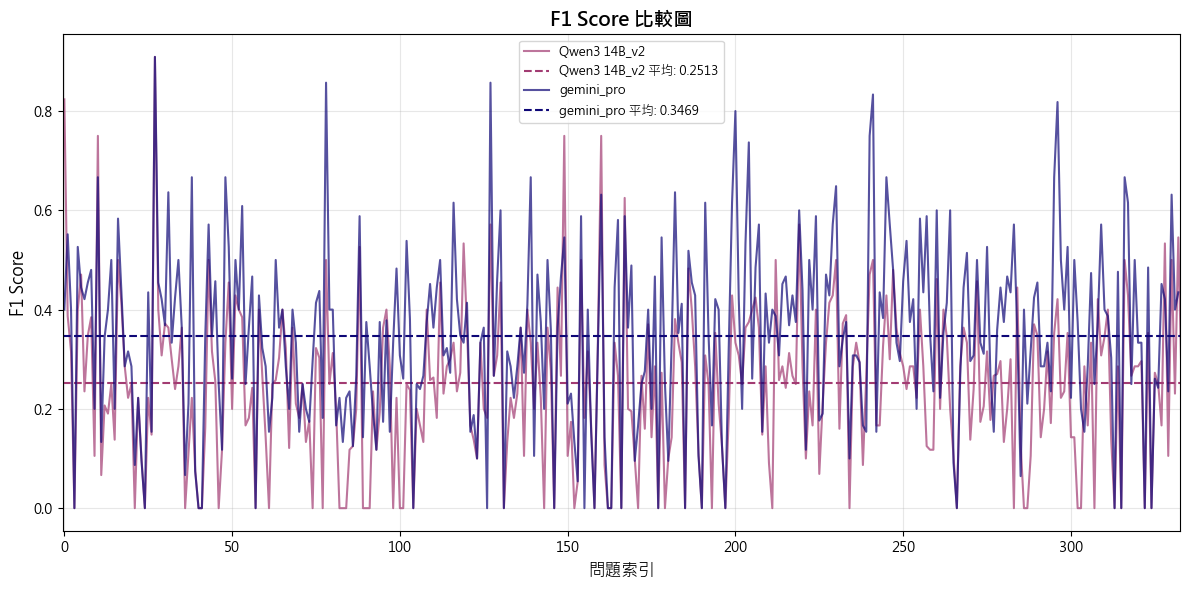

In [67]:
if __name__ == "__main__":
    # 比較兩個模型的 F1 Score
    plot_multiple_lines_from_csv(
        csv_configs=[
            {
                'csv_file': 'qwen_baseline_14B_v2.csv',
                'col_index': 0,
                'label': 'Qwen3 14B_v2',
                'header': 0,
                'color': '#A23B72'
            },
            {
                'csv_file': 'gemini_pro_results_v0.csv',
                'col_index': 0,
                'label': 'gemini_pro',
                'header': 0,
                'color':  "#0E0777"
            }
        ],
        xlabel='問題索引',
        ylabel='F1 Score',
        title='F1 Score 比較圖',
        filter=True
    )

Qwen3 14B_v1 - 平均: 1454.1884, 最大: 2000.0000, 最小: 383.0000
  有效數據點: 414/414
Qwen3 14B - 平均: 1489.1147, 最大: 2000.0000, 最小: 364.0000
  有效數據點: 706/706


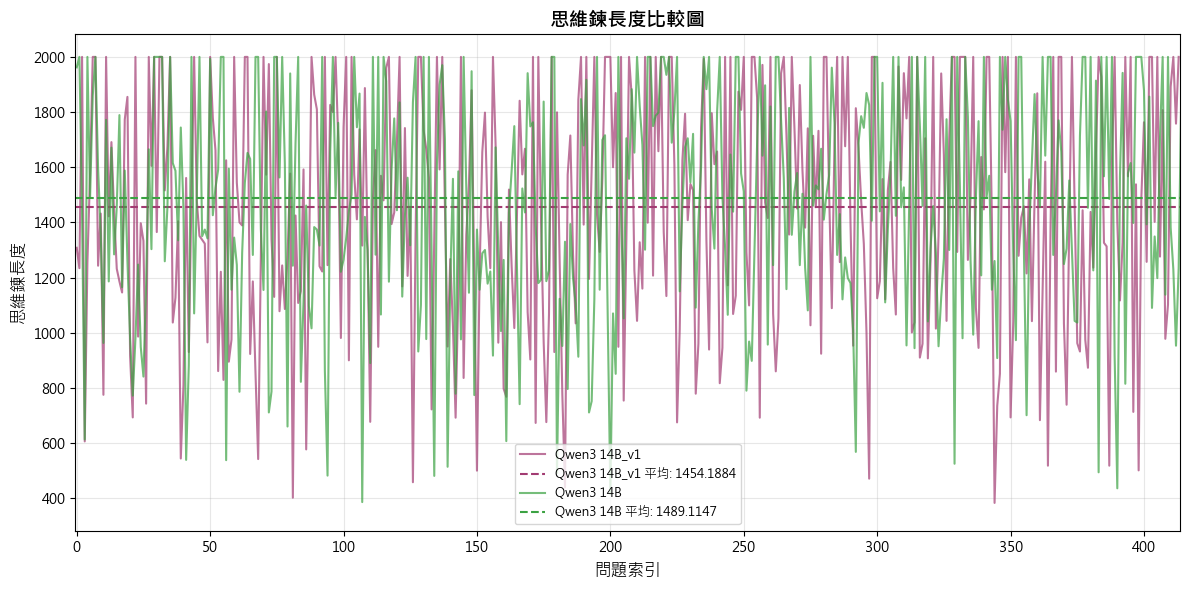

In [68]:
if __name__ == "__main__":
    # 比較兩個模型的 F1 Score
    plot_multiple_lines_from_csv(
        csv_configs=[
            {
                'csv_file': 'qwen_baseline_14B_v1.csv',
                'col_index': 1,
                'label': 'Qwen3 14B_v1',
                'header': 0,
                'color': '#A23B72'
            },
            {
                'csv_file': 'qwen_baseline_14B.csv',
                'col_index': 1,
                'label': 'Qwen3 14B',
                'header': 0,
                'color': "#3BA242"
            }
        ],
        xlabel='問題索引',
        ylabel='思維鍊長度',
        title='思維鍊長度比較圖',
        filter=True
    )